In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ipyfilechooser import FileChooser


%matplotlib inline

In [2]:
fc = FileChooser()
display(fc)


FileChooser(path='/home/daan/bitofpepper/ai_robot_new/ai_robot/notebooks', filename='', title='', show_hidden=…

In [6]:
#red data
data = pd.read_csv(os.path.join('..', 'simulator', 'logs', fc.selected))
data.head()

,stop,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,...,255.653,255.654,255.655,255.656,255.657,255.658,255.659,255.660,255.661,255.662
0,stop,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,stop,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,stop,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,stop,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,stop,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [7]:
#look at data 
#student code



<Axes: xlabel='stop'>

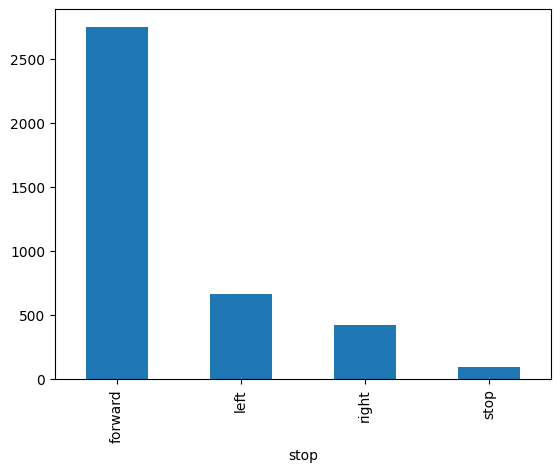

In [8]:
label_movement = data.columns[0]
#get the label fro the maovement action (forward. stop, left, right)
data[label_movement].value_counts().plot(kind='bar')

In [9]:
#plot a bar char of movement distribution


Text(0, 0.5, 'Count')

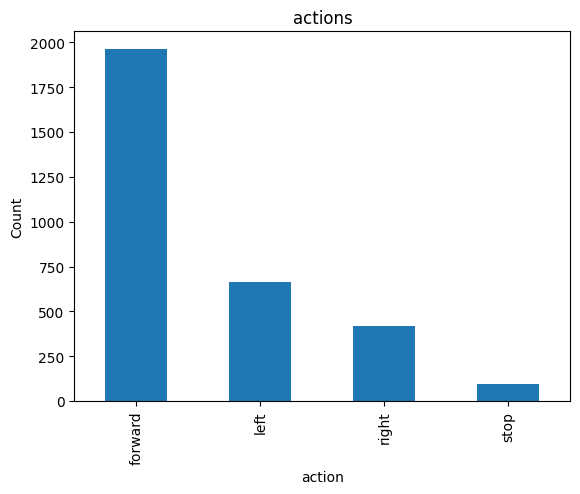

In [28]:
#think about distrigution effect on learning algorithm
data_random_forward = data[data[label_movement] == 'forward'].sample(n=int(data.shape[0]/5))
data.drop(data_random_forward.index,inplace=True)
data[label_movement].value_counts().plot(kind='bar')
plt.title('actions')
plt.xlabel('action')
plt.ylabel('Count')


In [29]:
#Get training data 
train1 = data.drop([label_movement],axis=1)

In [30]:
train1.head()

,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,255.9,...,255.653,255.654,255.655,255.656,255.657,255.658,255.659,255.660,255.661,255.662
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [31]:
from sklearn.svm import SVC

In [32]:
clf = SVC()

In [33]:
data = data.dropna()

data_no_stop = data[data[label_movement] != 'stop']
conv_labels = [0 if values == 'forward' else values for values in data_no_stop[label_movement] ]
conv_labels = [1 if values == 'left' else values for values in conv_labels ]
conv_labels = [2 if values == 'right' else values for values in conv_labels ]

labels = conv_labels
train1 = data_no_stop.drop([ label_movement],axis=1)
data_no_stop.describe()


,255,255.1,255.2,255.3,255.4,255.5,255.6,255.7,255.8,255.9,...,255.653,255.654,255.655,255.656,255.657,255.658,255.659,255.660,255.661,255.662
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,229.994093,229.994093,229.994093,230.974073,230.974073,230.974073,226.570397,226.570397,226.570397,225.180505,...,213.340335,208.424024,208.424024,208.424024,200.942238,200.942238,200.942238,195.145061,195.145061,195.145061
std,60.730133,60.730133,60.730133,60.300089,60.300089,60.300089,65.276433,65.276433,65.276433,67.176668,...,76.276504,79.470974,79.470974,79.470974,83.263329,83.263329,83.263329,85.753031,85.753031,85.753031
min,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
25%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,154.000000,154.000000,154.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
50%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
75%,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train1, conv_labels, test_size = 0.10, random_state = 2)

In [36]:
clf.fit(x_train,y_train)

SVC()

In [37]:
clf.score(x_test, y_test)

0.7114754098360656

In [46]:
#Try other machine learning algorithms
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

model = make_pipeline(Normalizer(), SVC())
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.7213114754098361

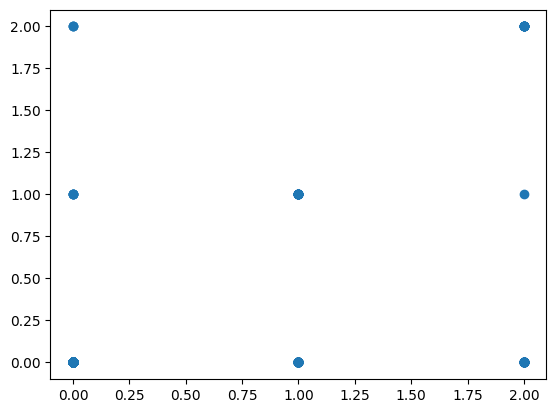

In [47]:
plt.scatter(y_test, clf.predict(x_test))

In [48]:
from sklearn import ensemble
#clf = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1)

In [49]:
#clf.fit(x_train, y_train)

In [50]:
#clf.score(x_test, y_test)

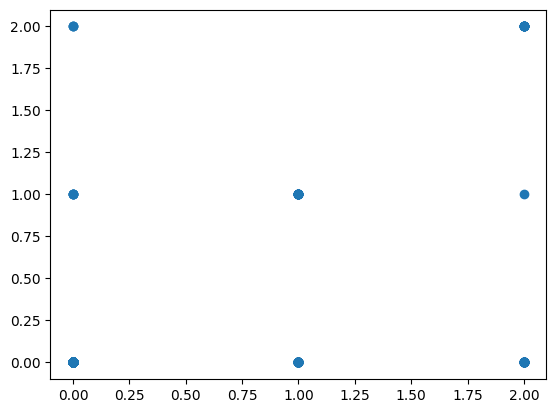

In [51]:
plt.scatter(y_test, clf.predict(x_test))

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
#try gridseaarch

In [53]:

#write the resulting model to a files that will be read by the simulator
from joblib import dump, load
dump(clf,os.path.join('..', 'models', 'auto_pilot.joblib'))

['../models/auto_pilot.joblib']